In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

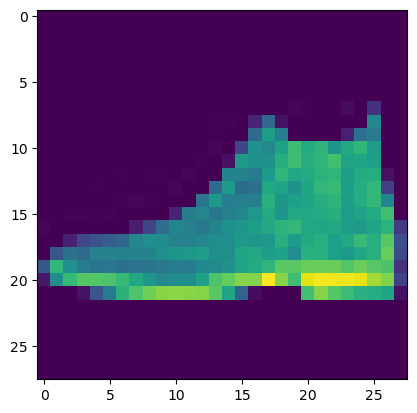

In [7]:
plt.imshow(x_test[0])

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [15]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='valid',input_shape=[28,28,1],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [18]:
model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=10,callbacks=[early])

Epoch 1/10


2023-04-13 21:35:32.130684: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 16s 8ms/step - loss: 0.6471 - accuracy: 0.7670 - val_loss: 0.4954 - val_accuracy: 0.8216
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4467 - accuracy: 0.8366 - val_loss: 0.4337 - val_accuracy: 0.8458
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3945 - accuracy: 0.8546 - val_loss: 0.4337 - val_accuracy: 0.8411
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3615 - accuracy: 0.8678 - val_loss: 0.3937 - val_accuracy: 0.8540
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3423 - accuracy: 0.8726 - val_loss: 0.3873 - val_accuracy: 0.8624
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3239 - accuracy: 0.8805 - val_loss: 0.3616 - val_accuracy: 0.8636
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3104 - accuracy: 0.8846 - val_loss: 0.3612 - val_accuracy: 0.8

In [19]:
loss=pd.DataFrame(model.history.history)

<Axes: >

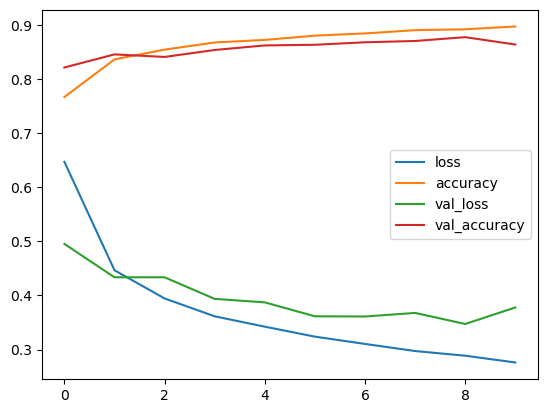

In [20]:
loss.plot()

In [21]:
pred=(model.predict(x_test)>0.5).astype('int32')

313/313 [==============================] - 1s 2ms/step


In [22]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [23]:
print(classification_report(y_test_cat.argmax(axis=1),pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.97      0.98      0.97      1000
           2       0.92      0.62      0.74      1000
           3       0.91      0.86      0.88      1000
           4       0.80      0.79      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.61      0.76      0.68      1000
           7       0.89      0.97      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.98      0.91      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



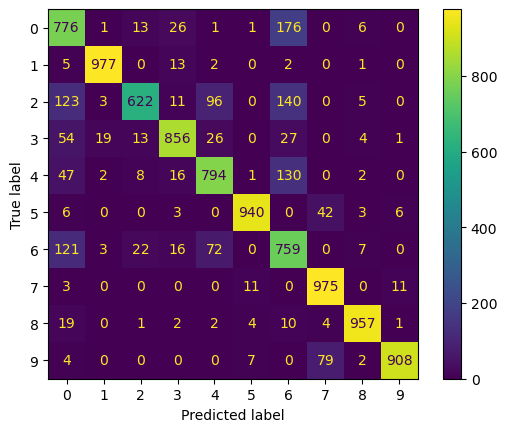

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test_cat.argmax(axis=1),pred.argmax(axis=1))